In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
# Download historical data
tickers = ['^GSPC', 'AGG']  # SPX and Aggregate Bond Index
data = yf.download(tickers, start="2010-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = np.log(data / data.shift(1)).dropna()

# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

[*********************100%%**********************]  2 of 2 completed


In [ ]:
df=pd.DataFrame(returns)
df

Ticker,AGG,^GSPC
Date,,
2010-01-05,0.004539,0.003111
2010-01-06,-0.000579,0.000545
2010-01-07,-0.001157,0.003993
2010-01-08,0.000579,0.002878
2010-01-11,-0.000772,0.001745
...,...,...
2022-12-23,-0.003464,0.005851
2022-12-27,-0.007274,-0.004058
2022-12-28,-0.001749,-0.012093


[*********************100%%**********************]  2 of 2 completed


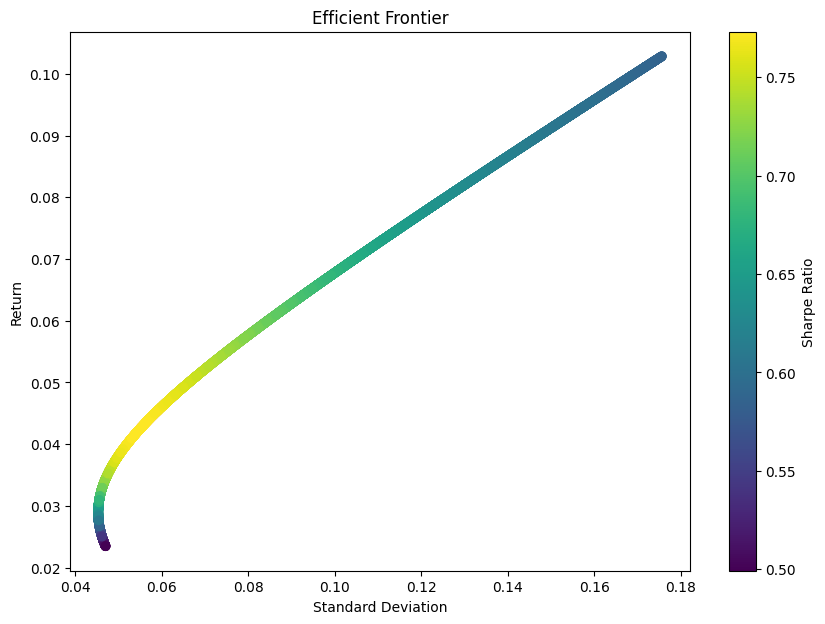

Portfolio with the maximum Sharpe Ratio
Return                0.042381
Standard Deviation    0.054823
Sharpe Ratio          0.773052
^GSPC Weight          0.761711
AGG Weight            0.238289
Name: 2539, dtype: float64


In [ ]:
def compute_efficient_frontier(tickers, start_date="2010-01-01", end_date="2024-01-01", num_portfolios=10000):
    # Download historical data
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

    # Calculate daily log returns
    log_returns = np.log(data / data.shift(1)).dropna()

    # Calculate mean log returns and covariance matrix
    mean_log_returns = log_returns.mean()
    cov_matrix = log_returns.cov()

    results = np.zeros((len(tickers)+3, num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)

        portfolio_return = np.sum(weights * mean_log_returns) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
        sharpe_ratio = portfolio_return / portfolio_std_dev

        results[0,i] = portfolio_return
        results[1,i] = portfolio_std_dev
        results[2,i] = sharpe_ratio
        for j in range(len(tickers)):
            results[j+3,i] = weights[j]

    columns = ['Return', 'Standard Deviation', 'Sharpe Ratio'] + [f'{ticker} Weight' for ticker in tickers]
    results_frame = pd.DataFrame(results.T, columns=columns)

    # Plotting the efficient frontier
    plt.figure(figsize=(10, 7))
    plt.scatter(results_frame['Standard Deviation'], results_frame['Return'], c=results_frame['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.show()

    # Finding the portfolio with the maximum Sharpe ratio
    max_sharpe_idx = results_frame['Sharpe Ratio'].idxmax()
    max_sharpe_portfolio = results_frame.loc[max_sharpe_idx]

    print("Portfolio with the maximum Sharpe Ratio")
    print(max_sharpe_portfolio)

# Example usage
tickers = ['^GSPC', 'AGG']  # Add any number of tickers
compute_efficient_frontier(tickers)


[*********************100%%**********************]  3 of 3 completed


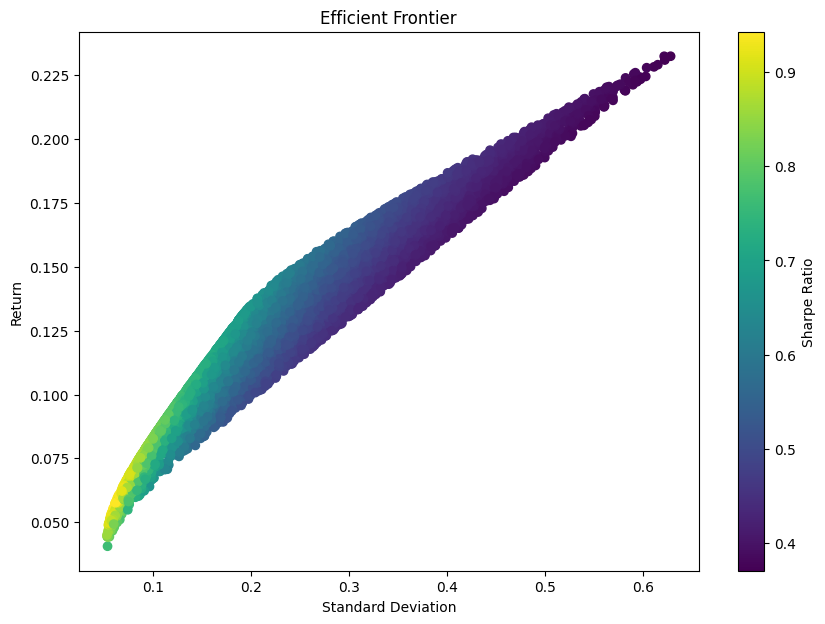

Portfolio with the maximum Sharpe Ratio
Return                0.057889
Standard Deviation    0.061385
Sharpe Ratio          0.943045
^GSPC Weight          0.788356
AGG Weight            0.016608
BTC-USD Weight        0.195036
Name: 38, dtype: float64


In [ ]:
# Example usage
tickers = ['^GSPC', 'AGG', 'BTC-USD']  # Add any number of tickers
compute_efficient_frontier(tickers)

[*********************100%%**********************]  3 of 3 completed


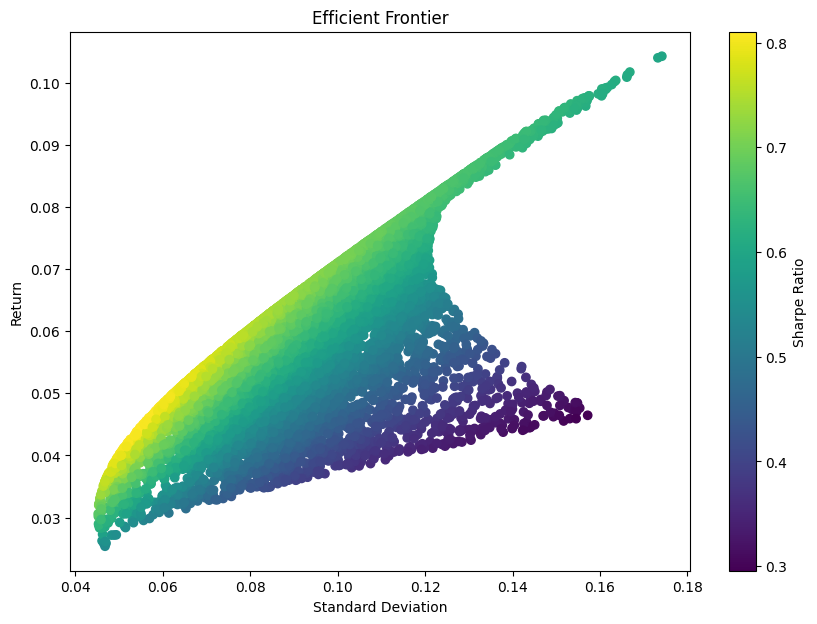

Portfolio with the maximum Sharpe Ratio
Return                0.044410
Standard Deviation    0.054802
Sharpe Ratio          0.810375
^GSPC Weight          0.709064
AGG Weight            0.061819
GC=F Weight           0.229116
Name: 6554, dtype: float64


In [ ]:
# Example usage
tickers = ['^GSPC', 'AGG', 'GC=F']  # Add any number of tickers
compute_efficient_frontier(tickers)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-7-eb3aa984df2b>:21: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


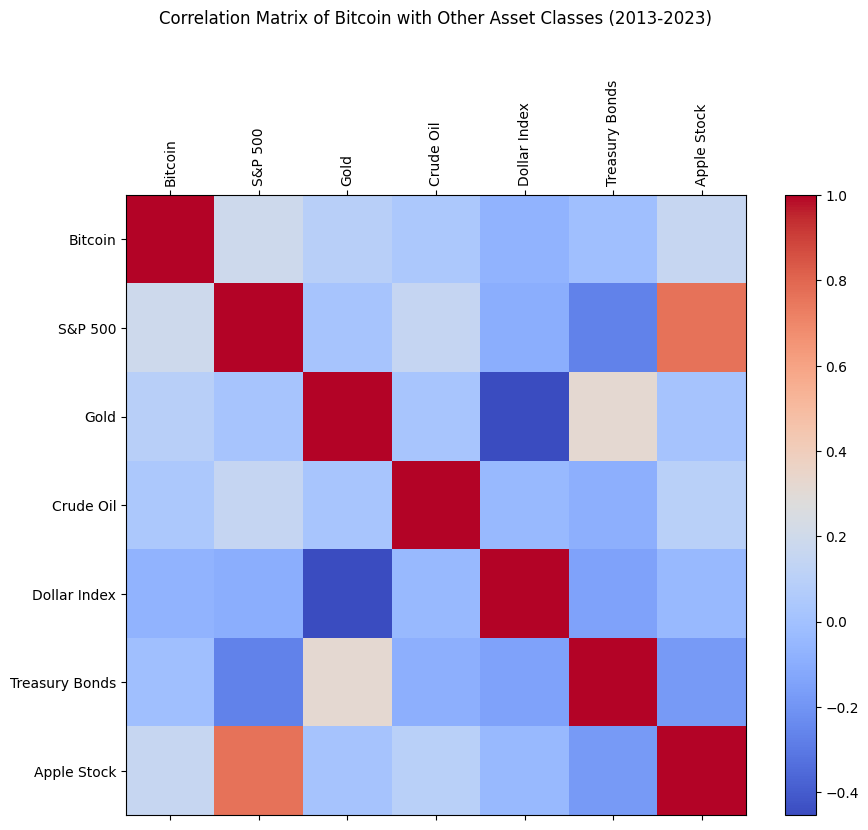

                 Bitcoin   S&P 500      Gold  Crude Oil  Dollar Index  \
Bitcoin         1.000000  0.191692  0.091535   0.041412     -0.070354   
S&P 500         0.191692  1.000000  0.019814   0.151623     -0.091354   
Gold            0.091535  0.019814  1.000000   0.024308     -0.454013   
Crude Oil       0.041412  0.151623  0.024308   1.000000     -0.041819   
Dollar Index   -0.070354 -0.091354 -0.454013  -0.041819      1.000000   
Treasury Bonds -0.008095 -0.267053  0.313287  -0.088510     -0.142960   
Apple Stock     0.157659  0.761982  0.016077   0.099143     -0.043706   

                Treasury Bonds  Apple Stock  
Bitcoin              -0.008095     0.157659  
S&P 500              -0.267053     0.761982  
Gold                  0.313287     0.016077  
Crude Oil            -0.088510     0.099143  
Dollar Index         -0.142960    -0.043706  
Treasury Bonds        1.000000    -0.176447  
Apple Stock          -0.176447     1.000000  


In [ ]:
# Define the tickers for the assets
tickers = {
    'Bitcoin': 'BTC-USD',
    'S&P 500': 'SPY',
    'Gold': 'GLD',
    'Crude Oil': 'CL=F',
    'Dollar Index': 'DX-Y.NYB',
    'Treasury Bonds': 'TLT',
    'Apple Stock': 'AAPL',
}

# Download historical data for the last 10 years
data = {}
for asset, ticker in tickers.items():
    data[asset] = yf.download(ticker, start='2013-05-21', end='2023-05-21')['Adj Close']

# Combine the data into a single DataFrame
df = pd.DataFrame(data)

# Calculate the daily returns
returns = df.pct_change().dropna()

# Calculate the correlation matrix
correlation_matrix = returns.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix of Bitcoin with Other Asset Classes (2013-2023)', pad=40)
plt.show()

# Display the correlation matrix
print(correlation_matrix)